# Audio Analysis

In [2]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.signal
from pydub import AudioSegment
from tqdm import tqdm

In [3]:
import shutil

INPUT_FOLDER = "/kaggle/input/anthem-audio/"
WORKING_FOLDER = "/kaggle/working/anthem-audio/"
os.makedirs(WORKING_FOLDER, exist_ok=True)

# Copy all audio files to a writable directory
for file in os.listdir(INPUT_FOLDER):
    shutil.copy(os.path.join(INPUT_FOLDER, file), WORKING_FOLDER)

In [4]:
OUTPUT_FOLDER = "/kaggle/working/analysis_results/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)


In [5]:
WORKING_FOLDER = "/tmp/anthem-audio/"
OUTPUT_FOLDER = "/tmp/analysis_results/"
os.makedirs(WORKING_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

Processing Anthems: 100%|██████████| 168/168 [03:24<00:00,  1.22s/it]
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

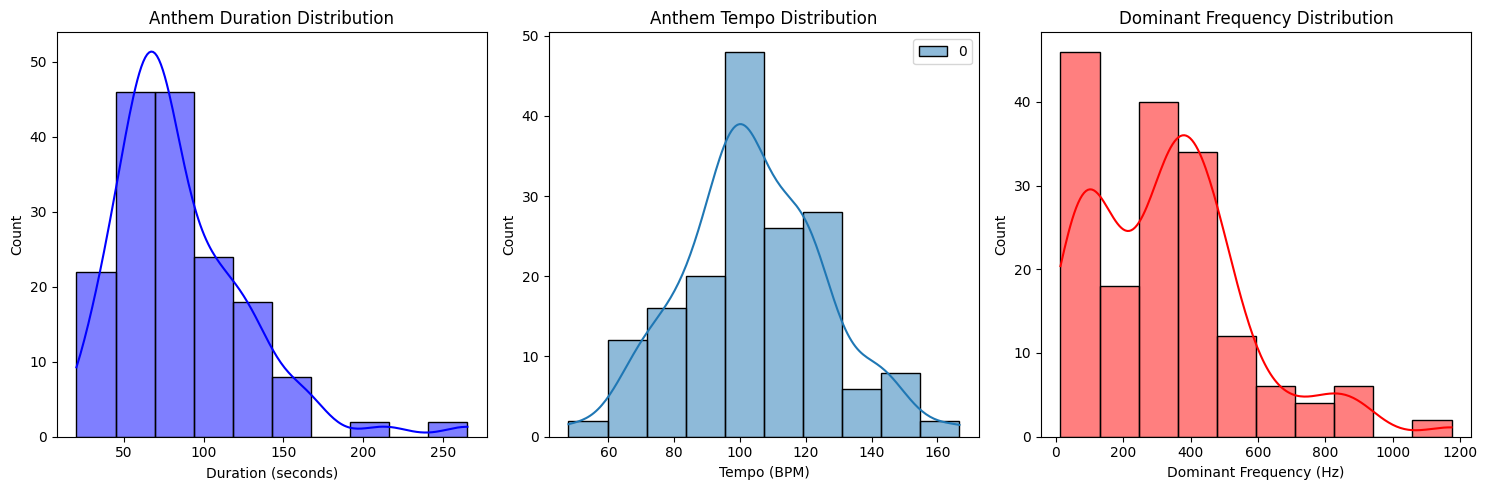


🎵 Anthem Audio Analysis Summary 🎵
Total anthems analyzed: 168
Avg Duration: 85.06 sec (Min: 20.12, Max: 265.56)
Avg Tempo: 104.30 BPM (Min: 47.85, Max: 166.71)
Avg Dominant Frequency: 332.95 Hz (Min: 13.38, Max: 1174.14)


In [11]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pydub import AudioSegment

# Paths
ANTHEM_FOLDER = "/kaggle/working/anthem-audio"
OUTPUT_FOLDER = "analysis_results/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Store analysis results
anthem_data = []

def analyze_anthem(file_path):
    """Analyze anthem audio file and extract tempo, duration, and frequency data."""
    if file_path.endswith(".mp3"):
        audio = AudioSegment.from_mp3(file_path)
        wav_path = file_path.replace(".mp3", ".wav")
        audio.export(wav_path, format="wav")
        file_path = wav_path  # Use converted file
    
    y, sr = librosa.load(file_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    fft_freqs = np.fft.fftfreq(len(y), d=1/sr)
    fft_magnitudes = np.abs(np.fft.fft(y))

    dominant_freq = fft_freqs[np.argmax(fft_magnitudes[:len(fft_freqs)//2])]

    return {
        "Filename": os.path.basename(file_path),
        "Sample Rate": sr,
        "Duration": duration,
        "Tempo (BPM)": tempo,
        "Dominant Frequency (Hz)": dominant_freq
    }

# Process all anthems
anthem_files = [f for f in os.listdir(ANTHEM_FOLDER) if f.endswith((".mp3", ".wav"))]
for anthem in tqdm(anthem_files, desc="Processing Anthems"):
    file_path = os.path.join(ANTHEM_FOLDER, anthem)
    anthem_data.append(analyze_anthem(file_path))

# Convert results to NumPy array
durations = np.array([d["Duration"] for d in anthem_data])
tempos = np.array([d["Tempo (BPM)"] for d in anthem_data])
frequencies = np.array([d["Dominant Frequency (Hz)"] for d in anthem_data])

# 🎵 **Visualization Section** 🎵
plt.figure(figsize=(15, 5))

# Histogram - Duration
plt.subplot(1, 3, 1)
sns.histplot(durations, bins=10, kde=True, color="blue")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Anthem Duration Distribution")

# Histogram - Tempo
plt.subplot(1, 3, 2)
sns.histplot(tempos, bins=10, kde=True, color="green")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.title("Anthem Tempo Distribution")

# Histogram - Dominant Frequency
plt.subplot(1, 3, 3)
sns.histplot(frequencies, bins=10, kde=True, color="red")
plt.xlabel("Dominant Frequency (Hz)")
plt.ylabel("Count")
plt.title("Dominant Frequency Distribution")

plt.tight_layout()
plt.savefig(f"{OUTPUT_FOLDER}anthem_analysis.png")
plt.show()

# 🎯 **Print Summary Statistics**
print("\n🎵 Anthem Audio Analysis Summary 🎵")
print(f"Total anthems analyzed: {len(anthem_data)}")
print(f"Avg Duration: {np.mean(durations):.2f} sec (Min: {np.min(durations):.2f}, Max: {np.max(durations):.2f})")
print(f"Avg Tempo: {np.mean(tempos):.2f} BPM (Min: {np.min(tempos):.2f}, Max: {np.max(tempos):.2f})")
print(f"Avg Dominant Frequency: {np.mean(frequencies):.2f} Hz (Min: {np.min(frequencies):.2f}, Max: {np.max(frequencies):.2f})")



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
CSV_FILE = "/kaggle/working/analysis_results/anthem_analysis.csv"
df = pd.read_csv(CSV_FILE)

# Show first few rows
print(df.head())


    Filename  Sample Rate  Duration (s)     Tempo (BPM)  Dominant Frequency
0  af-73.wav        44100          30.0  [109.95678191]          232.466667
1     bf.wav        44100          30.0   [90.66611842]          130.666667
2     al.wav        44100          30.0   [90.66611842]          418.333333
3    eus.wav        44100          30.0  [120.18531977]           38.133333
4     bj.wav        44100          30.0  [117.45383523]          462.666667
